In [1]:
# Install required libraries
!pip install tensorflow keras opencv-python matplotlib reportlab

# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from zipfile import ZipFile
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

In [4]:
with zipfile.ZipFile('/content/drive/MyDrive/archive (3).zip') as zf:
    pass # Add code here to work with the zipfile object zf

In [5]:
# User login simulation
username = input("Enter your username: ")
password = input("Enter your password: ")

if username == "admin" and password == "password123":
    print("Login successful!")
else:
    raise Exception("Invalid login credentials.")


Enter your username: admin
Enter your password: password123
Login successful!


In [6]:
import os
import cv2
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path
zip_path = "/content/drive/MyDrive/archive (3).zip"
extract_path = "/content/dataset"

# Extract ZIP file if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Now use the extracted folder as dataset path
dataset_path = extract_path

# Check if dataset path exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path '{dataset_path}' does not exist. Please check the path.")

categories = os.listdir(dataset_path)  # List category directories
img_size = 64
data = []
labels = []

# Load and process images
for idx, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)

    if not os.path.isdir(folder_path):  # Skip non-directory files
        continue

    for img in os.listdir(folder_path):
        try:
            img_array = cv2.imread(os.path.join(folder_path, img), cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(idx)
        except Exception as e:
            print(f"Error processing image {img}: {e}")

# Normalize data
data = np.array(data) / 255.0
labels = np.array(labels)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data split into training and testing sets.


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset path
dataset_path = "/content/dataset"  # Update with your actual dataset path

# Define image parameters
img_size = 64  # Adjust based on your dataset
batch_size = 32

# Define categories
categories = ["Good", "Hole", "Objects", "Oil Spot", "Thread Error"]

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # 80% training, 20% validation
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(len(categories), activation='softmax')  # Output layer for 5 classes
])



Found 20481 images belonging to 5 classes.
Found 5119 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Save the trained model
model.save("fabric_defect_cnn.h5")

print("Model training complete. Saved as fabric_defect_cnn.h5")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


641/641 ━━━━━━━━━━━━━━━━━━━━ 186s 287ms/step - accuracy: 0.8804 - loss: 243.4888 - val_accuracy: 0.9053 - val_loss: 0.4438
Epoch 2/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 201s 286ms/step - accuracy: 0.9085 - loss: 0.4314 - val_accuracy: 0.9053 - val_loss: 0.4422
Epoch 3/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 200s 283ms/step - accuracy: 0.9066 - loss: 0.4390 - val_accuracy: 0.9053 - val_loss: 0.4413
Epoch 4/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 181s 282ms/step - accuracy: 0.9053 - loss: 0.4441 - val_accuracy: 0.9053 - val_loss: 0.4432
Epoch 5/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 184s 287ms/step - accuracy: 0.9043 - loss: 0.4479 - val_accuracy: 0.9053 - val_loss: 0.4427
Epoch 6/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 181s 282ms/step - accuracy: 0.9063 - loss: 0.4395 - val_accuracy: 0.9053 - val_loss: 0.4416
Epoch 7/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 181s 282ms/step - accuracy: 0.9048 - loss: 0.4451 - val_accuracy: 0.9053 - val_loss: 0.4409
Epoch 8/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 180s 281ms/step - accuracy: 0.9040 - loss: 0.

Model training complete. Saved as fabric_defect_cnn.h5


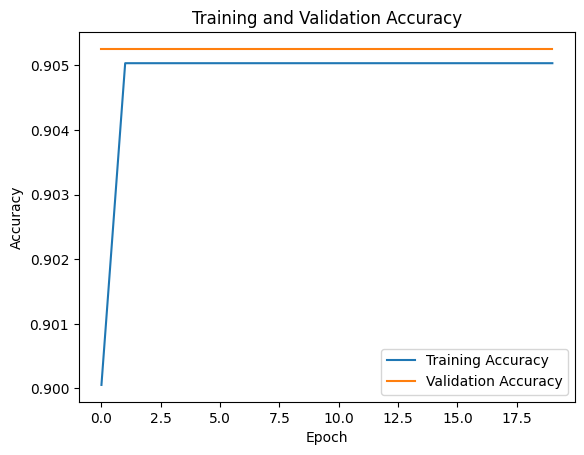

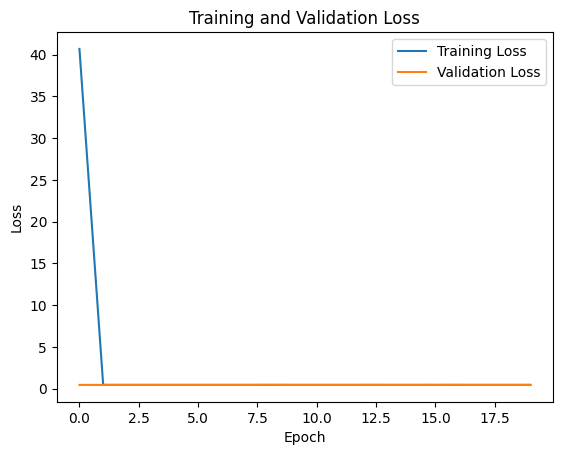

In [9]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


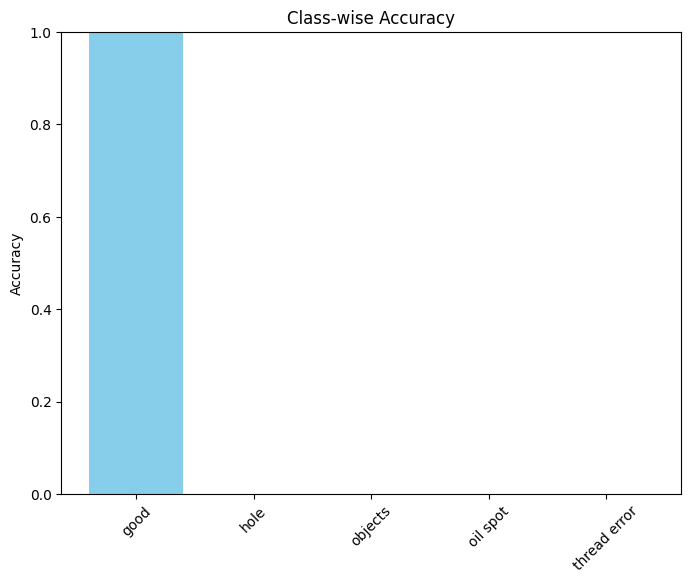

In [11]:
# Class-wise accuracy
from sklearn.metrics import accuracy_score

class_accuracies = []
for i in range(len(class_labels)):
    idxs = np.where(true_classes == i)[0]
    class_acc = accuracy_score(true_classes[idxs], predicted_classes[idxs])
    class_accuracies.append(class_acc)

# Bar chart
plt.figure(figsize=(8,6))
plt.bar(class_labels, class_accuracies, color='skyblue')
plt.title('Class-wise Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()


160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step


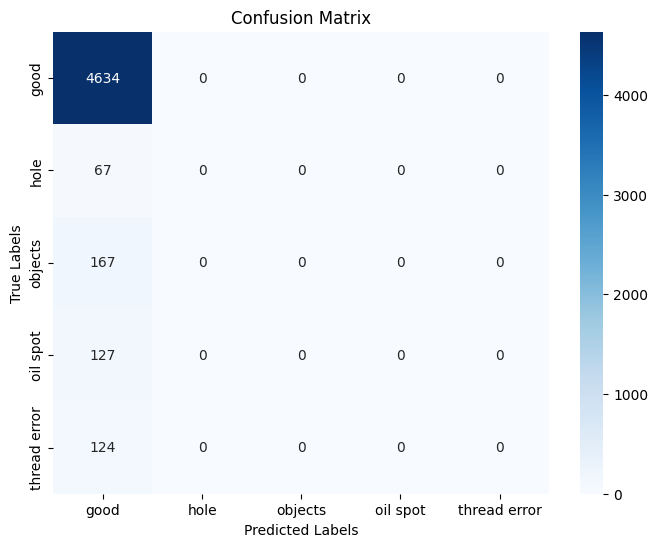

Classification Report:
              precision    recall  f1-score   support

        good       0.91      1.00      0.95      4634
        hole       0.00      0.00      0.00        67
     objects       0.00      0.00      0.00       167
    oil spot       0.00      0.00      0.00       127
thread error       0.00      0.00      0.00       124

    accuracy                           0.91      5119
   macro avg       0.18      0.20      0.19      5119
weighted avg       0.82      0.91      0.86      5119



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load model if needed (skip if already in memory)
# from tensorflow.keras.models import load_model
# model = load_model('fabric_defect_cnn.h5')

# Predict on the validation set
val_generator.reset()
predictions = model.predict(val_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
